## **Load des données et animations** ##



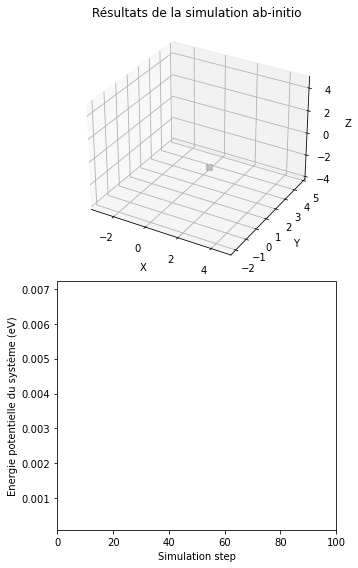

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import pandas as pd

%matplotlib inline

#Loader du fichier .xyz
def load_data(file):
    o1_index=[2]
    o2_index=[3]
    h1_index=[4]
    h2_index=[5]
    h3_index=[6]
    h4_index=[7]
    h5_index=[8]

    o1=[]
    o2=[]
    h1=[]
    h2=[]
    h3=[]
    h4=[]
    h5=[]

    with open(file, 'r') as infile:

        for index, line in enumerate(infile):
            items = line.split()

            if index%9 in o1_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                o1.append([0,x,y,z])

            if index%9 in o2_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                o2.append([0,x,y,z])

            if index%9 in h1_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h1.append([1,x,y,z])   

            if index%9 in h2_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h2.append([1,x,y,z])

            if index%9 in h3_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h3.append([1,x,y,z])

            if index%9 in h4_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h4.append([1,x,y,z])

            if index%9 in h5_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h5.append([1,x,y,z])
                
    return np.concatenate((o1, o2, h1, h2, h3, h4, h5), axis=1).reshape(10000, 7, 4) #10000 fois 7 colomnes de 4 éléments  (particule, x, y, z)

#Loader de l'output de la simulation (fichier .out)
output=pd.read_csv('new_energies_sparse.out', sep=' ', header=None)

#output=pd.read_csv('zundel-1.ener', sep='       ')
#Extraction des énergies (5eme colonne)
energies=output[4]

#energies=output['     Pot.[a.u.]'][0::5]

#Load du fichier .xyz
#dataset=load_data("zundel-pos-1.xyz")
dataset=load_data("new_positions_sparse.xyz")

#################
# Plot des données (Animation 3D + Energie)
#################

#Nombre de data utilisées pour l'animation
N=100

#Init animation 2D
def init():
    return graph,

#Fonction update plot energies
def update_en(num):
    graph.set_data(x[:num],y[:num])
    return graph,

#Mise en forme des trajectoires
def transform_data(X, Y, Z):
    t = np.vstack((X, Y, Z))
    return t

#Fonction update pour le plot des trajectoires
def update_lines(num, dataLines, lines) :
    for line, data in zip(lines, dataLines) :
        line.set_data(data[0:2, num-1:num])
        line.set_3d_properties(data[2,num-1:num])
    return lines

#Fonction update des deux plots
def update_both(num, data2, line2):
    update_en(num)
    update_lines(num, data2, line2)
    
#Création de la figure
fig= plt.figure(figsize=(5, 8))

#ax1 = plot des énergies
ax1=fig.add_subplot(2, 1, 2) 
ax1.set_xlim(0, N)
ax1.set_ylim(np.min(energies), np.max(energies))
ax1.set_xlabel("Simulation step")
ax1.set_ylabel("Energie potentielle du système (eV)")

graph, = plt.plot([], [], '-')

#ax = plot des trajectoires
ax=fig.add_subplot(2, 1, 1, projection='3d')

ax.set_xlim3d([np.min(dataset[:, :, 1][:N]), np.max(dataset[:, :, 1][:N])])
ax.set_xlabel('X')

ax.set_ylim3d([np.min(dataset[:, :, 2][:N]), np.max(dataset[:, :, 2][:N])])
ax.set_ylabel('Y')

ax.set_zlim3d([np.min(dataset[:, :, 3][:N]), np.max(dataset[:, :, 3][:N])])
ax.set_zlabel('Z')

ax.set_title('Résultats de la simulation ab-initio')

plt.tight_layout()

# Données de l'énergie
x = range(N)
y = energies[:N]

# Données 3D
data=[]
lines=[]
colors=['k', 'r', 'orange','blue', 'purple', 'silver', 'silver'] #couleur des atomes
for i in range(dataset.shape[1]):
    coord=dataset[:, i][:N]
    X=coord[:, 1]
    Y=coord[:, 2]
    Z=coord[:, 3]
    data.append(transform_data(X, Y, Z))
    
    lines.append(ax.plot(data[0][0,0:1], data[0][1,0:1], data[0][2,0:1], 'o', color=colors[i])[0])

# Objet d'animation
ani = animation.FuncAnimation(fig, update_both, len(X), fargs=(data, lines),
                              interval=100, blit=False)

# ani.save('ab-initio.mp4')
plt.show()

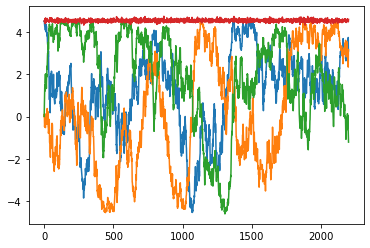

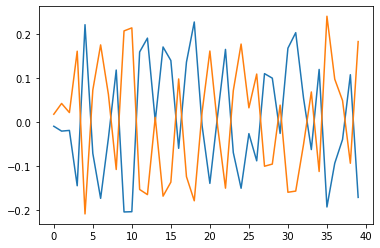

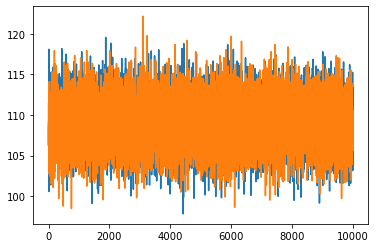

In [18]:
import vg

O1=dataset[:,0,1:4]
O2=dataset[:,1,1:4]
H=dataset[:,2,1:4]
H11=dataset[:,5,1:4]
H12=dataset[:,6,1:4]
H21=dataset[:,3,1:4]
H22=dataset[:,4,1:4]

O2_O1=O1-O2
O2_H=H-O2
O1_H=H-O1
O1_H11=H11-O1
O1_H12=H12-O1
O2_H21=H21-O2
O2_H22=H22-O2


dO_O=np.linalg.norm(O2_O1,axis=1)
dO1_H=np.linalg.norm(O1_H,axis=1)
dO2_H=np.linalg.norm(O2_H,axis=1)

val_visu=2200
range_tab=np.arange(val_visu)
plt.plot(range_tab,O2_O1[:val_visu,0])
# plt.show()
plt.plot(range_tab,O2_O1[:val_visu,1])
# plt.show()
plt.plot(range_tab,O2_O1[:val_visu,2])
# plt.show()


plt.plot(range_tab,dO_O[:val_visu])


plt.show()
val_visu=40
range_tab=np.arange(val_visu)
plt.plot(range_tab,dO1_H[:val_visu]-dO_O[:val_visu]/2)
plt.plot(range_tab,dO2_H[:val_visu]-dO_O[:val_visu]/2)
# plt.plot(range_tab,dO_O[:val_visu]/2)



plt.show()
H22_O2_H21 = vg.angle(O2_H21,O2_H22)
H21_O1_H11 = vg.angle(O1_H11,O1_H12)
vg.angle(O2_H21,O2_H22)
plt.plot(H22_O2_H21)
plt.plot(H21_O1_H11)

plt.show()

C:\Users\zways\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


dO_O moyen : 4.53007034788335  +-  0.05661715866559092


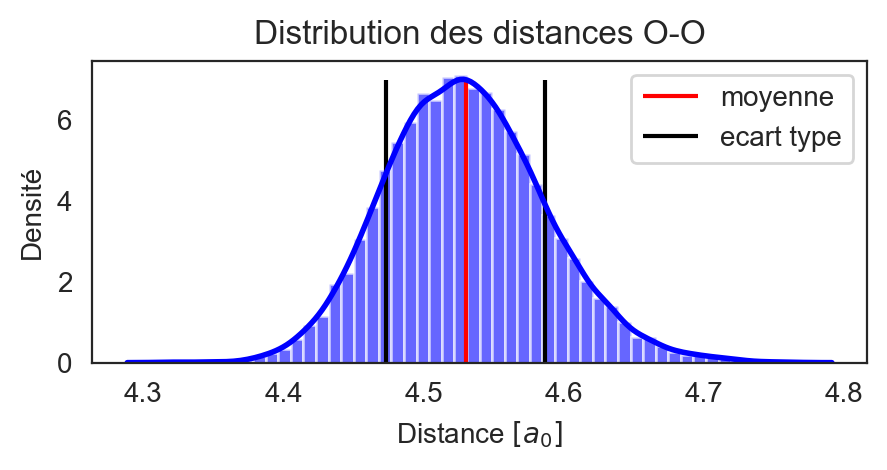

C:\Users\zways\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zways\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


dO1_H moyen : 2.27340180914684  +-  0.12949155504015944


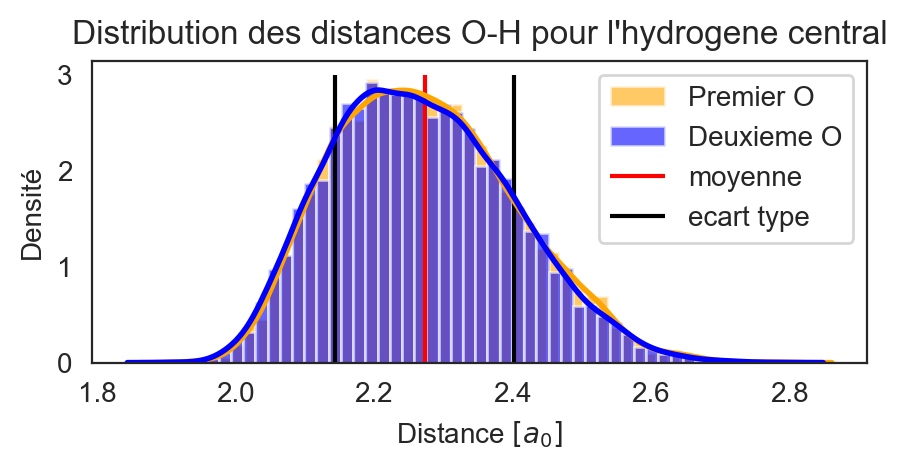

C:\Users\zways\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zways\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


H22_O2_H21 moyen : 108.90639931766596  +-  2.813481373777933


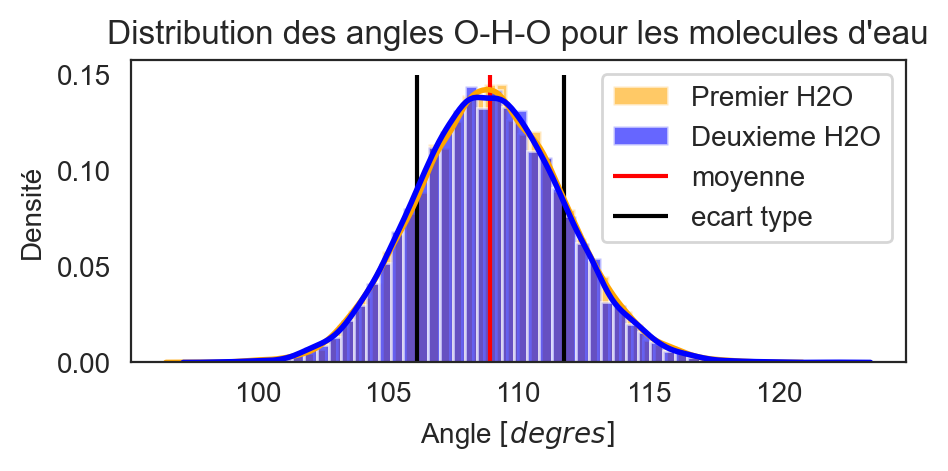

In [22]:
import seaborn as sns
sns.set_style("white")


# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(5,2), dpi= 200)
sns.distplot(pd.DataFrame(dO_O), color="blue", **kwargs)
plt.vlines(dO_O.mean(),0,7,color="red", label="moyenne")
plt.vlines(dO_O.mean()+dO_O.std(),0,7, label="ecart type",color="k")
plt.vlines(dO_O.mean()-dO_O.std(),0,7, color="k")
print("dO_O moyen :",dO_O.mean()," +- ",dO_O.std())

plt.legend()
plt.xlabel(r'Distance $[a_0]$')
plt.ylabel("Densité")

plt.title("Distribution des distances O-O")
plt.show()
plt.figure(figsize=(5,2), dpi= 200)

sns.distplot(pd.DataFrame(dO1_H), color="orange", label="Premier O", **kwargs)
sns.distplot(pd.DataFrame(dO2_H), color="blue", label="Deuxieme O", **kwargs)
plt.vlines(dO1_H.mean(),0,3,color="red", label="moyenne")
plt.vlines(dO1_H.mean()+dO1_H.std(),0,3, label="ecart type",color="k")
plt.vlines(dO1_H.mean()-dO1_H.std(),0,3, color="k")
print("dO1_H moyen :",dO1_H.mean()," +- ",dO1_H.std())

plt.legend()
plt.xlabel(r'Distance $[a_0]$')
plt.ylabel("Densité")

plt.title("Distribution des distances O-H pour l'hydrogene central")

plt.show()
plt.figure(figsize=(5,2), dpi= 200)

sns.distplot(pd.DataFrame(H22_O2_H21), color="orange", label="Premier H2O", **kwargs)
sns.distplot(pd.DataFrame(H21_O1_H11), color="blue", label="Deuxieme H2O", **kwargs)
plt.vlines(H22_O2_H21.mean(),0,0.15,color="red", label="moyenne")
plt.vlines(H22_O2_H21.mean()+H22_O2_H21.std(),0,0.15, label="ecart type",color="k")
plt.vlines(H22_O2_H21.mean()-H22_O2_H21.std(),0,0.15, color="k")
print("H22_O2_H21 moyen :",H22_O2_H21.mean()," +- ",H22_O2_H21.std())

plt.xlabel(r'Angle $[degres]$')
plt.ylabel("Densité")

plt.title("Distribution des angles O-H-O pour les molecules d'eau")
plt.legend()

plt.show()


la distance des O ne varie pas sur les données ab initio => minimisation de l'E 

In [2]:
import mdtraj as mdt
import nglview as nv
nv.show_mdtraj(mdt.load_xyz("new_positions_sparse.xyz", top='zundel.pdb', stride=1))

NGLWidget(max_frame=9999)

In [3]:
dataset=dataset

In [4]:
output

,0,1,2,3,4,5,6,7,8
0,1.0,2.0,0.003692,0.003269,0.000096,0.003174,0.000302,95.439881,NaN
1,1.0,102.0,0.004527,0.006531,0.002632,0.003899,0.000371,117.256850,NaN
2,1.0,202.0,0.003945,0.007161,0.002978,0.004182,0.000398,125.779360,NaN
3,1.0,302.0,0.003904,0.005873,0.002675,0.003198,0.000305,96.178014,NaN
4,1.0,402.0,0.004485,0.007464,0.003446,0.004018,0.000383,120.833550,NaN
...,...,...,...,...,...,...,...,...,...
9995,1.0,999502.0,0.013434,0.006745,0.002987,0.003757,0.000358,112.999770,NaN
9996,1.0,999602.0,0.012982,0.004565,0.001085,0.003480,0.000331,104.660550,NaN
9997,1.0,999702.0,0.013049,0.006868,0.003645,0.003222,0.000307,96.906016,NaN
9998,1.0,999802.0,0.013642,0.006621,0.002572,0.004050,0.000386,121.790850,NaN


## **Mise en place des descripteurs (matrice de Coulomb)** ##

In [5]:
from ase import Atoms
from dscribe.descriptors import CoulombMatrix

#Fonction pour la création de la matrice de Coulomb à partir d'un dataset
def create_CM(data):
    cm = CoulombMatrix(n_atoms_max=7)
    zundel_steps=[]
    for i in range(data.shape[0]):
        zundel_steps.append(cm.create(Atoms("O2H5", [(data[i][j][1], data[i][j][2], data[i][j][3]) for j in range(data.shape[1])])))
    return np.array(zundel_steps)

## **Séparation et exploration statistique des données**. ##

data shape : (10000, 7, 4)
target shape : (10000,)


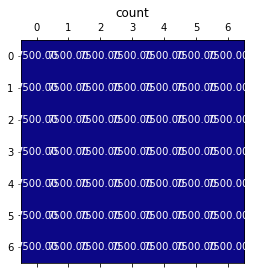

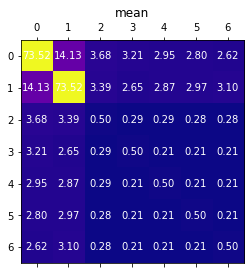

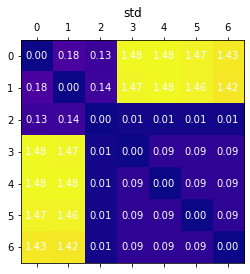

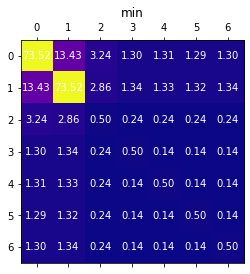

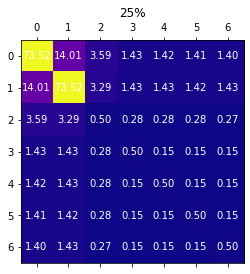

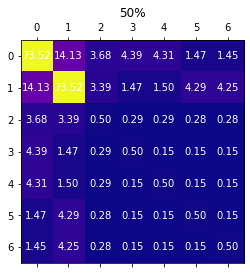

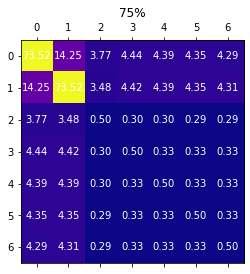

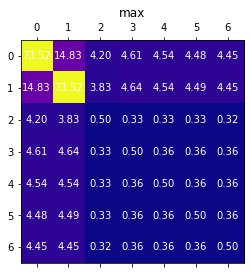

In [6]:
#Séparation des données
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

print("data shape :", dataset.shape)
print("target shape :", energies.shape)
X_train, X_test, y_train, y_test=train_test_split(dataset, energies, random_state=22)

#création des matrices de Coulomb pour les données d'entrainement
X_train_CM=create_CM(X_train)
X_test_CM=create_CM(X_test)

#conversion dans un Dataset pour explorer les données statistiquement avec les outils pandas
X_train_DF=pd.DataFrame(X_train_CM)

stat=X_train_DF.describe()

statnp=stat.to_numpy().reshape(8, 7, 7)

for i, l in enumerate(stat.index):
    #plt.subplot(2, 4, i+1)
    plt.matshow(statnp[i], cmap="plasma")
    for (x, y), value in np.ndenumerate(statnp[i]):
        plt.text(x, y, f"{value:.2f}", va="center", ha="center", color="white")
    plt.title(l)


In [7]:
dataset[-1]

array([[ 0.        ,  2.58654844, 12.89679366, 21.45336724],
       [ 0.        , -0.20412227, 13.11867535, 24.9613151 ],
       [ 1.        ,  1.21485485, 12.90784129, 23.29377728],
       [ 1.        , -0.7129864 , 14.85135666, 25.21131349],
       [ 1.        , -1.63287982, 11.99057295, 25.01914398],
       [ 1.        ,  3.9226899 , 11.70316952, 21.33694977],
       [ 1.        ,  1.88295753, 13.20836486, 19.83790884]])

Text(0.5, 1.0, 'Exemple de matrice de Coulomb')

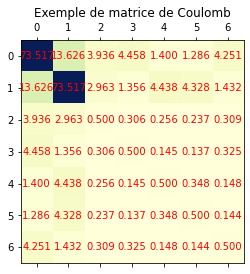

In [8]:
plt.matshow(create_CM(X_train)[0].reshape(7, 7), cmap="YlGnBu")

for (x, y), value in np.ndenumerate(create_CM(X_train)[0].reshape(7, 7)):
    plt.text(x, y, f"{value:.3f}", va="center", ha="center", color="red")
    
plt.title("Exemple de matrice de Coulomb")

Réduction des données


In [9]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_CM_red=scaler.fit_transform(X_train_CM)
X_test_CM_red=scaler.fit_transform(X_test_CM)

#scaling des y
y_train=scaler.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test=scaler.fit_transform(y_test.to_numpy().reshape(-1, 1))

### Eigenspectrum ###

In [10]:
def create_CM_eigen(data):
    cm = CoulombMatrix(n_atoms_max=7, permutation='eigenspectrum')
    zundel_steps=[]
    for i in range(data.shape[0]):
        zundel_steps.append(cm.create(Atoms("O2H5", [(data[i][j][1], data[i][j][2], data[i][j][3]) for j in range(data.shape[1])])))
    return np.array(zundel_steps)

In [11]:
pd.DataFrame(create_CM_eigen(X_train)).describe()

,0,1,2,3,4,5,6
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,88.701505,59.682468,0.417565,0.242826,0.173534,0.162842,0.152649
std,0.183102,0.177838,0.009194,0.006553,0.004729,0.004301,0.005124
min,87.977655,58.979104,0.388062,0.219960,0.157364,0.143278,0.131788
25%,88.582326,59.559842,0.411327,0.238478,0.170198,0.159958,0.149336
50%,88.705274,59.678830,0.417490,0.242890,0.173346,0.162958,0.152911
75%,88.827863,59.797708,0.423616,0.247244,0.176679,0.165817,0.156172
max,89.435804,60.383806,0.453386,0.267795,0.194823,0.178765,0.169214


In [12]:
X_train_CMe=create_CM_eigen(X_train)
X_test_CMe=create_CM_eigen(X_test)
X_train_CMe_red=scaler.fit_transform(X_train_CMe)
X_test_CMe_red=scaler.fit_transform(X_test_CMe)

## SOAP ##

In [13]:
from dscribe.descriptors import SOAP
from ase.io import read
from sklearn.decomposition import PCA
from asaplib.reducedim import KernelPCA
from dscribe.kernels import AverageKernel

def SOAP_Vectors(xyz_filename, output_filename=None, cutoff=3., n_max=6, l_max=6, zeta=2.0,
         atom_sigma=0.5, pbc=True, peratom=False, pca_d=25, njobs=4,kernel_matrix=True):
    """KenelPCA on atomic or per-config SOAP vectors.

    `peratom=True` performs projection on SOAP vectors from arrays
    `peratom=False` performs projection on SOAP vectors from info

    Note:
    The previous ASAP pca.py was projecting from info anyways and with peratom=True transformed the SOAP vectors from
    arrays into that space as well.

    Parameters
    ----------
    xyz_filename
    prefix
    output_filename
    cutoff
    n_max
    l_max
    zeta
    atom_sigma
    pbc
    peratom
    pca_d
    njobs

    Returns
    -------

    """

    peratom = bool(peratom)

    # read the xyz file
    frames = read(xyz_filename, ':')
    n_frames = len(frames)

    # species and PBC
    global_species = []
    for frame in frames:
        global_species.extend(frame.get_atomic_numbers())
        frame.set_pbc(pbc)
    global_species = np.unique(global_species)
    print("loaded xyz file: {fn}, with {n_frames} frames and elements: {ele}".format(fn=xyz_filename, n_frames=n_frames,
                                                                                     ele=global_species))

    # soap
    desc = SOAP(rcut=cutoff, nmax=n_max, lmax=l_max, sigma=atom_sigma, species=global_species, periodic=False,
                average="off")

    # kernel
    soap_vectors = desc.create(frames, n_jobs=njobs)
    if kernel_matrix :
        rel = AverageKernel(metric="linear")
        kNN = np.array([((features_2d@features_2d.T))** zeta for features_2d in soap_vectors])
        print("kernel matrix (shape: {}) calculated from vector set of shape {}".format(kNN.shape, soap_vectors.shape))

        # projection
        data_2d = np.array([features_2d.flatten() for features_2d in kNN])
        pca = PCA(n_components=pca_d)
        pca.fit(data_2d)
        knn_pca = pca.transform(data_2d)
        print("original shape:   ", kNN.shape) 
        print("transformed shape:", knn_pca.shape)
        return knn_pca,pca
    else :  
        data_2d = np.array([features_2d.flatten() for features_2d in soap_vectors])
        pca = PCA(n_components=pca_d)
        pca.fit(data_2d)
        Soap_pca = pca.transform(data_2d)
        print("original shape:   ", soap_vectors.shape) 
        print("transformed shape:", Soap_pca.shape)
        return Soap_pca,pca



In [14]:
Soap_pca,pca=SOAP_Vectors("new_positions_sparse.xyz", output_filename=None, cutoff=3., n_max=6, l_max=6, zeta=2.0,
         atom_sigma=0.5, pbc=True, peratom=False, pca_d=49, njobs=4,kernel_matrix=False)

loaded xyz file: new_positions_sparse.xyz, with 10000 frames and elements: [1 8]
original shape:    (10000, 7, 546)
transformed shape: (10000, 49)


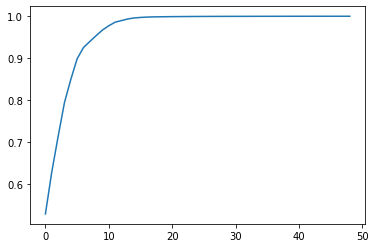

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [16]:

X_train, X_test, y_train, y_test=train_test_split(Soap_pca, energies, random_state=22)

y_train=scaler.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test=scaler.fit_transform(y_test.to_numpy().reshape(-1, 1))
X_train_red=scaler.fit_transform(X_train)
X_test_red=scaler.fit_transform(X_test)


## PIV Vector ##

In [12]:
from scipy.spatial import distance

def PIV_descr(X):
    piv=[]
    for i in range(len(X)):
        dist=distance.cdist(dataset[i][:, 1:], dataset[i][:, 1:], 'euclidean')
        a=np.array([dist[0, 1]])
        b=np.concatenate((dist[0, 2:],dist[1, 2:]))
        c=[]
        for i in range(2, dist.shape[0]):
            c=np.concatenate((c, dist[i, i+1:]))

        bs=-np.sort(-b)
        cs=-np.sort(-c)
        piv.append(np.concatenate((a, bs, cs)))
        
    return piv

In [13]:
X_train_PIV=PIV_descr(X_train)
X_train_PIV_red=scaler.fit_transform(X_train_PIV)
X_test_PIV=PIV_descr(X_test)
X_test_PIV_red=scaler.fit_transform(X_test_PIV)

## **Prédicteur naif** ##

In [20]:
from sklearn.metrics import mean_squared_error

def naive_predictor(xtrain, ytrain):
    return np.ones((xtrain.shape[0],))*ytrain.mean()

y_fit=naive_predictor(X_train_red, y_train)
y_pred_test=naive_predictor(X_test_red,y_train)


mse=mean_squared_error(y_train, y_fit)
mse_test=mean_squared_error(y_test, y_pred_test)
print(mse)
print(mse_test)

1.0
1.0


In [69]:
y_fit=naive_predictor(X_train_PIV_red, y_train)
y_pred_test=naive_predictor(X_test_PIV_red, y_train)


mse=mean_squared_error(np.array(y_train), y_fit)
mse_test=mean_squared_error(np.array(y_test), y_pred_test)
print(mse)
print(mse_test)

NameError: name 'X_train_PIV_red' is not defined

## **Modèle linéaire** ##

In [21]:
from sklearn.linear_model import RidgeCV

a=np.logspace(-10, 10, 1000)
model=RidgeCV(alphas=a)
model.fit(X_train_red, y_train)

print("Best regularization parameter :", model.alpha_)
print("RMSE moyen:", -model.best_score_)

y_pred_test_rcv=model.predict(X_test_red)
mse_test_rcv=mean_squared_error(np.array(y_test), y_pred_test_rcv)
print(mse_test_rcv)

Best regularization parameter : 7.778411071286482
RMSE moyen: 0.08960807587427674
0.09540121611922012


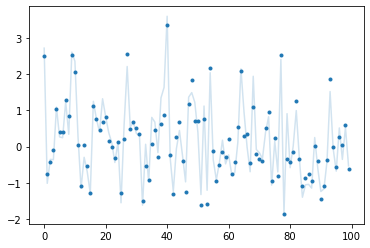

In [23]:
plt.scatter(np.arange(0, len(y_train[:100])),model.predict(X_train_red[:100]), marker='.')
plt.plot(np.arange(0, len(y_train[:100])), y_train[:100], alpha=0.2)

In [24]:
#PIV
from sklearn.linear_model import RidgeCV

a=np.logspace(-10, 10, 1000)
model=RidgeCV(alphas=a)
model.fit(X_train_red, y_train)

print("Best regularization parameter :", model.alpha_)
print("RMSE moyen:", -model.best_score_)

y_pred_test_rcv=model.predict(X_test_red)
mse_test_rcv=mean_squared_error(np.array(y_test), y_pred_test_rcv)
print(mse_test_rcv)

Best regularization parameter : 7.778411071286482
RMSE moyen: 0.08960807587427674
0.09540121611922012


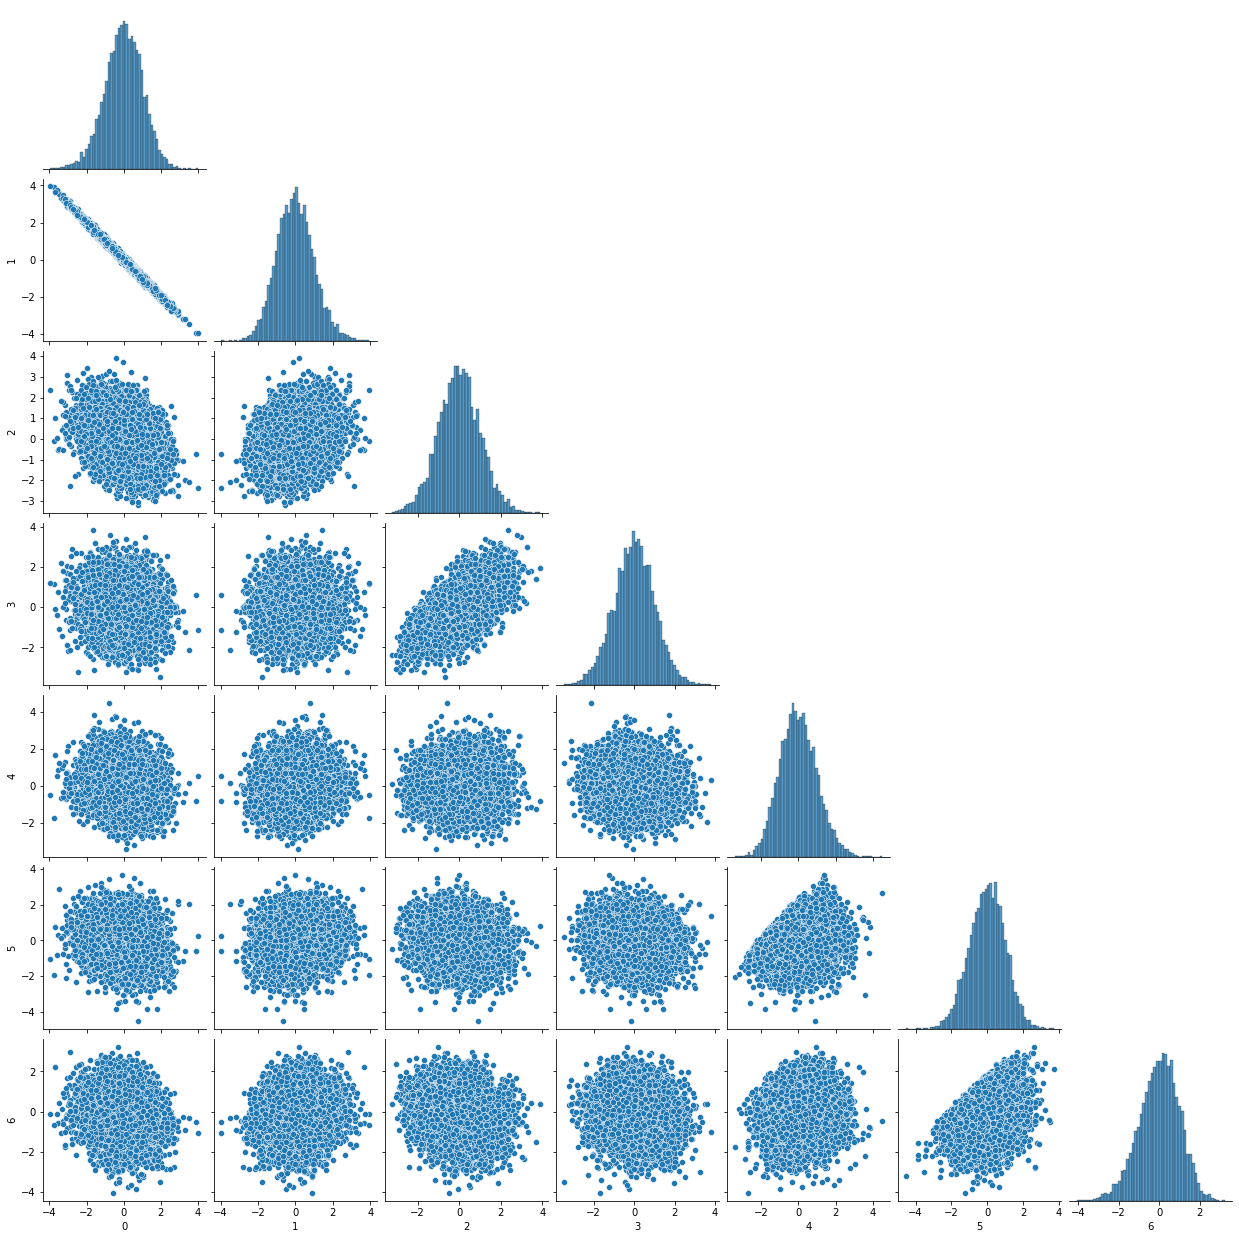

In [28]:
import seaborn as sns

sns.pairplot(pd.DataFrame(X_train_CMe_red), corner=True)



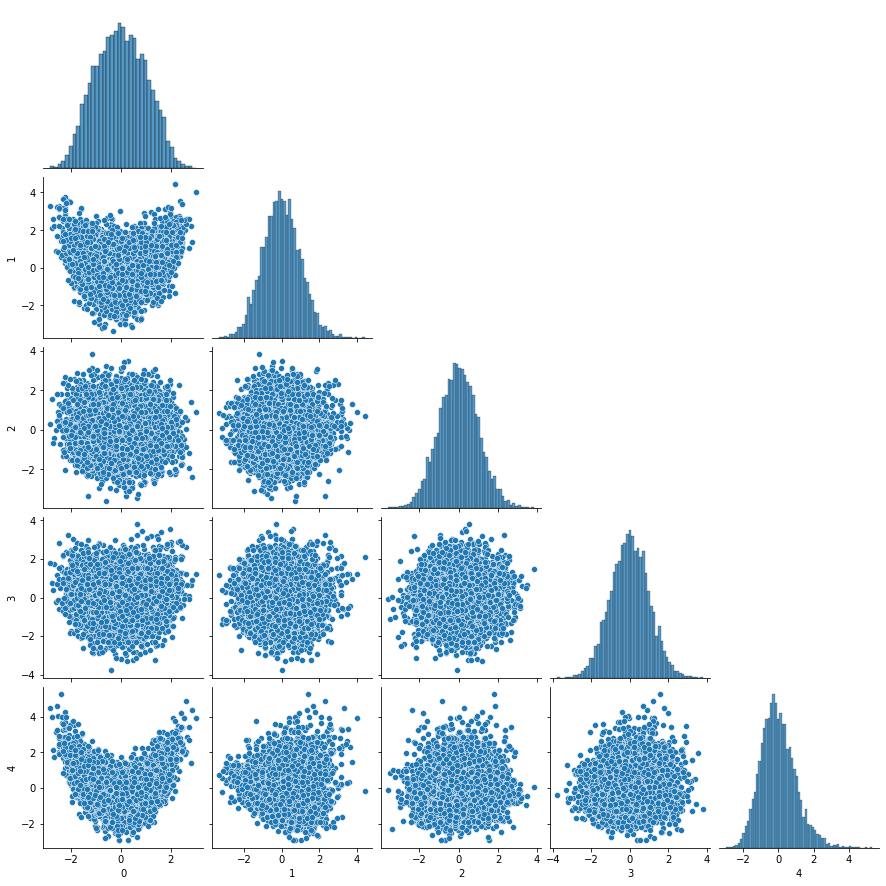

In [31]:
sns.pairplot(pd.DataFrame(X_train_red[:,:5]), corner=True)


In [127]:
from sklearn.preprocessing import PolynomialFeatures

mse_list=[]
mse_test_list=[]
for d in range(1,5):
    poly=PolynomialFeatures(degree=d)
    Zmodif=poly.fit_transform(X_train_CMe_red)
    Zmodif_test=poly.fit_transform(X_test_CMe_red)

    a=np.logspace(-10, 10, 1000)
    model=RidgeCV(alphas=a)
    model.fit(Zmodif, y_train)

    print("Best regularization parameter :", model.alpha_)
    print("RMSE moyen:", -model.best_score_)

    y_pred_test_rcv=model.predict(Zmodif_test)
    mse_test_rcv=mean_squared_error(np.array(y_test), y_pred_test_rcv)
    print(mse_test_rcv)
    mse_list.append(-model.best_score_)
    mse_test_list.append(mse_test_rcv)

Best regularization parameter : 17.030650292528428
RMSE moyen: 0.7911226116852111
0.7564859632710308
Best regularization parameter : 14.162866162991973
RMSE moyen: 0.5399559357654162
0.5213666113617779
Best regularization parameter : 17.030650292528428
RMSE moyen: 0.5402247037401428
0.5217424378175992
Best regularization parameter : 42.818517986524064
RMSE moyen: 0.5518063896545434
0.5342317688300231


Text(0.5, 0, 'Dimension du polynome')

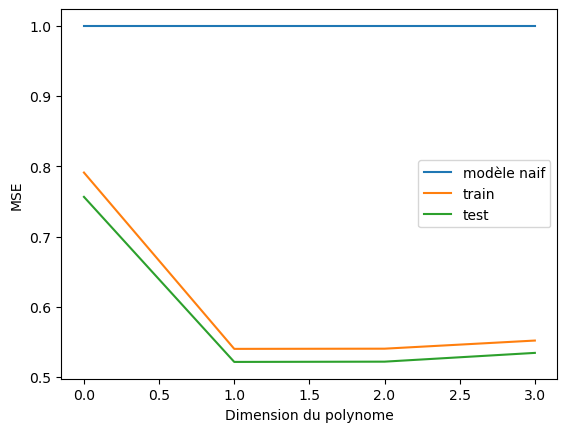

In [131]:
plt.plot([1]*len(mse_list), label='modèle naif')
plt.plot(mse_list, label="train")
plt.plot(mse_test_list, label='test')
plt.legend()
plt.ylabel("MSE")
plt.xlabel("Dimension du polynome")

In [132]:
y_pred=model.predict(Zmodif_test)

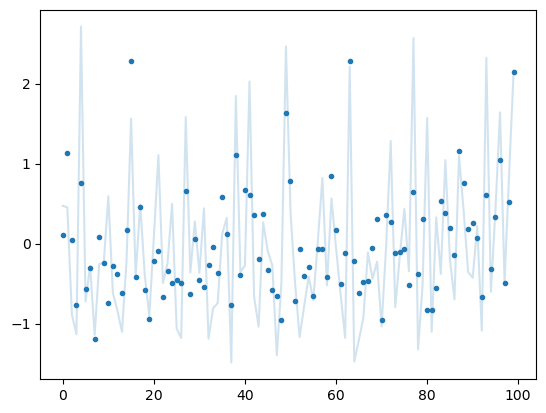

In [133]:
plt.scatter(np.arange(0, len(y_test[:100])),y_pred[:100], marker='.')
plt.plot(np.arange(0, len(y_test[:100])), y_test[:100], alpha=0.2)

In [134]:
from sklearn.linear_model import ElasticNetCV

a=np.logspace(-10, 10)
model=ElasticNetCV(alphas=a, max_iter=1000000)
model.fit(X_train_CMe_red, y_train)

print("Best regularization parameter :", model.alpha_)
#print("RMSE moyen:", -model.best_score_)

y_pred_train_en=model.predict(X_train_CMe_red)
mse_train_en=mean_squared_error(np.array(y_train), y_pred_train_en)
print(mse_train_en)


y_pred_test_en=model.predict(X_test_CMe_red)
mse_test_en=mean_squared_error(np.array(y_test), y_pred_test_en)
print(mse_test_en)

Best regularization parameter : 0.000339322177189533
0.7893650565523528
0.7564322245105621


/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [135]:
np.arange(1, 80, 30)

array([ 1, 31, 61])

In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
krr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,param_grid={"alpha": np.logspace(-10, 10,5),
                                                                          "gamma": np.logspace(-10, 10,5)})
krr.fit(X_train, y_train)

y_pred_test_krr=krr.predict(X_test)

mse_test=mean_squared_error(np.array(y_test), y_pred_test_krr)
print(mse_test)

0.3290686172831737


In [148]:
krr.best_params_


{'alpha': 1e-10, 'gamma': 1e-10}

In [144]:
krr=KernelRidge(kernel='rbf', gamma=0.0316, alpha=1e-8)
krr.fit(X_train, y_train)

y_pred_test_krr=krr.predict(X_test)

mse_test=mean_squared_error(np.array(y_test), y_pred_test_krr)
print(mse_test)

0.999999998929003


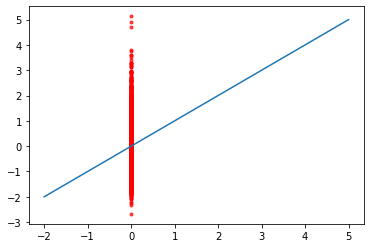

In [145]:
y_pred_test_krr=krr.predict(X_test)
plt.scatter(y_pred_test_krr,  y_test, marker='.', color='red',alpha=0.7)
plt.plot([-2, 5], [-2, 5])
plt.show()

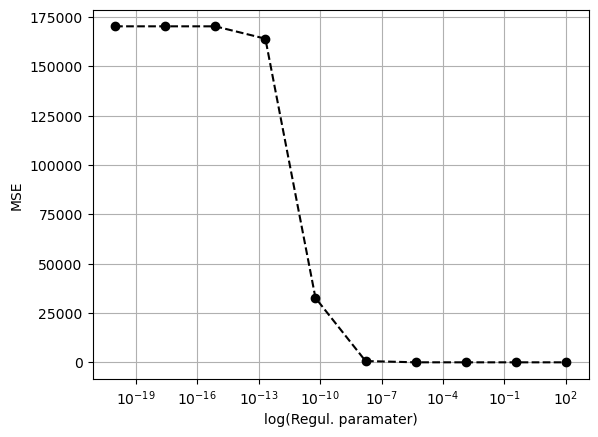

In [139]:
plt.semilogx(A, mse_test_krr, marker='o', linestyle='--', color='black')
plt.xlabel("log(Regul. paramater)")
plt.ylabel("MSE")
plt.grid(True, which="both", ls="-")
plt.show()

In [140]:
print("Best score KRR :", np.min(mse_test_krr))
idx=np.where(np.array(mse_test_krr)==np.min(mse_test_krr))
print("Best param KRR :", A[idx])

Best score KRR : 0.5443779420662072
Best param KRR : [0.35938137]


## **Réseau de neurones** ##

In [17]:
import keras
import tensorflow as tf
from keras import regularizers
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
from ase.io import read

def gen_model(xyz_filename="new_positions_sparse.xyz"):
    frames = read(xyz_filename, ':')
    n_frames = len(frames)
    
    global_species=frames[0].get_atomic_numbers()
    global_species_unique = np.unique(global_species)
    print(global_species)
    print(global_species_unique)
    for species in global_species_unique:
        num_atoms=np.count_nonzero(global_species == species)
        
        
gen_model()

[8 8 1 1 1 1 1]
[1 8]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                750       
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,006
Trainable params: 1,006
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
94/94 [==============================] - 2s 10ms/step - loss: 0.9923 - mean_squared_error: 0.9923 - val_loss: 0.5393 - val_mean_squared_error: 0.5393
Epoch 2/300
94/94 [==============================] - 0s 5ms/step - loss: 0.3415 - mean_squared_error: 0.3415 - val_loss: 0.2044 - val_mean_squared_error: 0.

Epoch 97/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 98/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 99/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 100/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 101/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 102/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 103/300
94/94 [====

94/94 [==============================] - 0s 5ms/step - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 198/300
94/94 [==============================] - 0s 4ms/step - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 199/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 200/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 201/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 202/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 203/300
94/94 [===============

94/94 [==============================] - 0s 5ms/step - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 298/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 299/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 300/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0419 - val_mean_squared_error: 0.0419


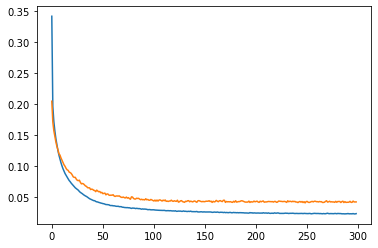

In [18]:
import keras
import tensorflow as tf
from keras import regularizers
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.8)

model=Sequential()
model.add(Dense(units=15, activation='tanh', input_shape=(49,)))
model.add(Dense(units=15, activation='tanh'))
model.add(Dense(units=1))
model.summary()

model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['mean_squared_error'])


Hist=model.fit(X_train_red, y_train, epochs=300, batch_size=64, validation_split=0.2)

plt.plot(Hist.history['loss'][1:])
plt.plot(Hist.history['val_loss'][1:])



#model.predict(X_train_CM_red)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 15)                750       
                                                                 
 dense_4 (Dense)             (None, 15)                240       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,006
Trainable params: 1,006
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
94/94 [==============================] - 2s 9ms/step - loss: 1.6249 - mean_squared_error: 0.6720 - val_loss: 1.0820 - val_mean_squared_error: 0.3261
Epoch 2/300
94/94 [==============================] - 0s 5ms/step - loss: 0.8196 - mean_squared_error: 0.2202 - val_loss: 0.6123 - val_mean_squared_error: 0

Epoch 97/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0622 - mean_squared_error: 0.0463 - val_loss: 0.0657 - val_mean_squared_error: 0.0497
Epoch 98/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0621 - mean_squared_error: 0.0463 - val_loss: 0.0625 - val_mean_squared_error: 0.0464
Epoch 99/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0608 - mean_squared_error: 0.0450 - val_loss: 0.0582 - val_mean_squared_error: 0.0424
Epoch 100/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0603 - mean_squared_error: 0.0445 - val_loss: 0.0593 - val_mean_squared_error: 0.0436
Epoch 101/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0591 - mean_squared_error: 0.0435 - val_loss: 0.0619 - val_mean_squared_error: 0.0463
Epoch 102/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0606 - mean_squared_error: 0.0452 - val_loss: 0.0639 - val_mean_squared_error: 0.0483
Epoch 103/300
94/94 [====

94/94 [==============================] - 0s 4ms/step - loss: 0.0530 - mean_squared_error: 0.0421 - val_loss: 0.0531 - val_mean_squared_error: 0.0424
Epoch 198/300
94/94 [==============================] - 0s 4ms/step - loss: 0.0521 - mean_squared_error: 0.0413 - val_loss: 0.0542 - val_mean_squared_error: 0.0432
Epoch 199/300
94/94 [==============================] - 0s 4ms/step - loss: 0.0535 - mean_squared_error: 0.0425 - val_loss: 0.0481 - val_mean_squared_error: 0.0374
Epoch 200/300
94/94 [==============================] - 0s 4ms/step - loss: 0.0532 - mean_squared_error: 0.0424 - val_loss: 0.0504 - val_mean_squared_error: 0.0394
Epoch 201/300
94/94 [==============================] - 0s 4ms/step - loss: 0.0521 - mean_squared_error: 0.0414 - val_loss: 0.0528 - val_mean_squared_error: 0.0420
Epoch 202/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0520 - mean_squared_error: 0.0411 - val_loss: 0.0524 - val_mean_squared_error: 0.0414
Epoch 203/300
94/94 [===============

94/94 [==============================] - 0s 5ms/step - loss: 0.0514 - mean_squared_error: 0.0411 - val_loss: 0.0491 - val_mean_squared_error: 0.0390
Epoch 298/300
94/94 [==============================] - 0s 4ms/step - loss: 0.0510 - mean_squared_error: 0.0409 - val_loss: 0.0523 - val_mean_squared_error: 0.0419
Epoch 299/300
94/94 [==============================] - 0s 4ms/step - loss: 0.0508 - mean_squared_error: 0.0407 - val_loss: 0.0498 - val_mean_squared_error: 0.0394
Epoch 300/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0495 - mean_squared_error: 0.0393 - val_loss: 0.0527 - val_mean_squared_error: 0.0425


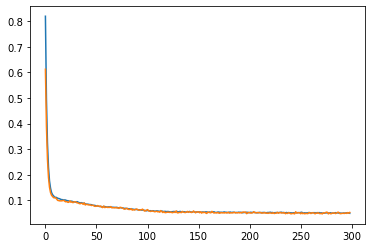

In [19]:
model_reg=Sequential()
model_reg.add(Dense(units=15, activation='tanh', input_shape=(49,), kernel_regularizer=regularizers.l2(0.05)))

model_reg.add(Dense(units=15, activation='tanh'))
model_reg.add(Dense(units=1))
model_reg.summary()

model_reg.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['mean_squared_error'])
Hist_reg=model_reg.fit(X_train_red, y_train, epochs=300, batch_size=64, validation_split=0.2)

plt.plot(Hist_reg.history['loss'][1:])
plt.plot(Hist_reg.history['val_loss'][1:])



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 15)                750       
                                                                 
 dense_7 (Dense)             (None, 15)                240       
                                                                 
 dense_8 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,006
Trainable params: 1,006
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
94/94 [==============================] - 1s 7ms/step - loss: 1.7406 - mean_squared_error: 0.8294 - val_loss: 1.0823 - val_mean_squared_error: 0.3447
Epoch 2/300
94/94 [==============================] - 0s 4ms/step - loss: 0.8142 - mean_squared_error: 0.2190 - val_loss: 0.6092 - val_mean_squared_error: 0

Epoch 97/300
94/94 [==============================] - 0s 4ms/step - loss: 0.0633 - mean_squared_error: 0.0504 - val_loss: 0.0646 - val_mean_squared_error: 0.0518
Epoch 98/300
94/94 [==============================] - 0s 4ms/step - loss: 0.0641 - mean_squared_error: 0.0513 - val_loss: 0.0620 - val_mean_squared_error: 0.0494
Epoch 99/300
94/94 [==============================] - 0s 4ms/step - loss: 0.0648 - mean_squared_error: 0.0520 - val_loss: 0.0604 - val_mean_squared_error: 0.0476
Epoch 100/300
94/94 [==============================] - 0s 4ms/step - loss: 0.0675 - mean_squared_error: 0.0547 - val_loss: 0.0623 - val_mean_squared_error: 0.0490
Epoch 101/300
94/94 [==============================] - 0s 4ms/step - loss: 0.0670 - mean_squared_error: 0.0537 - val_loss: 0.0607 - val_mean_squared_error: 0.0479
Epoch 102/300
94/94 [==============================] - 0s 4ms/step - loss: 0.0625 - mean_squared_error: 0.0497 - val_loss: 0.0631 - val_mean_squared_error: 0.0502
Epoch 103/300
94/94 [====

94/94 [==============================] - 0s 4ms/step - loss: 0.0573 - mean_squared_error: 0.0454 - val_loss: 0.0566 - val_mean_squared_error: 0.0448
Epoch 198/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0579 - mean_squared_error: 0.0461 - val_loss: 0.0548 - val_mean_squared_error: 0.0430
Epoch 199/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0575 - mean_squared_error: 0.0456 - val_loss: 0.0556 - val_mean_squared_error: 0.0439
Epoch 200/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0584 - mean_squared_error: 0.0466 - val_loss: 0.0603 - val_mean_squared_error: 0.0485
Epoch 201/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0579 - mean_squared_error: 0.0460 - val_loss: 0.0590 - val_mean_squared_error: 0.0470
Epoch 202/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0596 - mean_squared_error: 0.0477 - val_loss: 0.0588 - val_mean_squared_error: 0.0470
Epoch 203/300
94/94 [===============

94/94 [==============================] - 0s 5ms/step - loss: 0.0571 - mean_squared_error: 0.0457 - val_loss: 0.0551 - val_mean_squared_error: 0.0439
Epoch 298/300
94/94 [==============================] - 0s 4ms/step - loss: 0.0564 - mean_squared_error: 0.0451 - val_loss: 0.0588 - val_mean_squared_error: 0.0473
Epoch 299/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0565 - mean_squared_error: 0.0450 - val_loss: 0.0566 - val_mean_squared_error: 0.0452
Epoch 300/300
94/94 [==============================] - 0s 5ms/step - loss: 0.0569 - mean_squared_error: 0.0455 - val_loss: 0.0578 - val_mean_squared_error: 0.0463


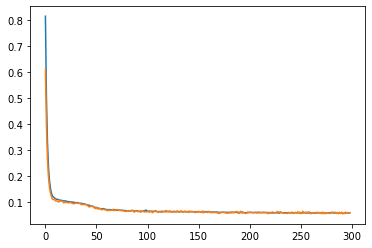

In [20]:
model_drop=Sequential()
model_drop.add(Dense(units=15, activation='tanh', input_shape=(49,), kernel_regularizer=regularizers.l2(0.05)))
model.add(Dropout(0.2))
model_drop.add(Dense(units=15, activation='tanh'))
model_drop.add(Dense(units=1))
model_drop.summary()

model_drop.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['mean_squared_error'])
Hist_drop=model_drop.fit(X_train_red, y_train, epochs=300, batch_size=64, validation_split=0.2)

plt.plot(Hist_drop.history['loss'][1:])
plt.plot(Hist_drop.history['val_loss'][1:])

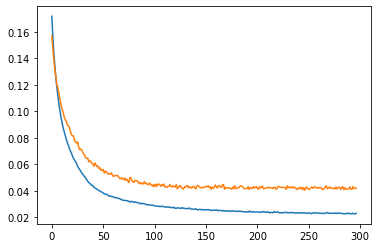

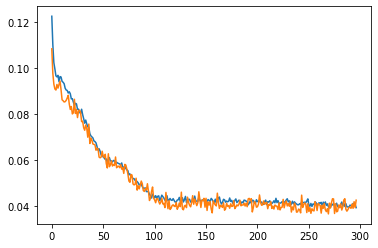

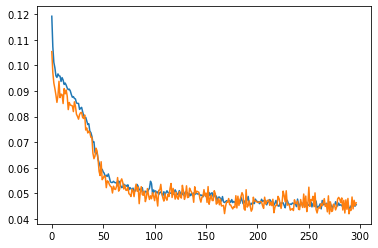

In [21]:
plt.plot(Hist.history['mean_squared_error'][3:])
plt.plot(Hist.history['val_mean_squared_error'][3:])
plt.show()
plt.plot(Hist_reg.history['mean_squared_error'][3:])
plt.plot(Hist_reg.history['val_mean_squared_error'][3:])
plt.show()
plt.plot(Hist_drop.history['mean_squared_error'][3:])
plt.plot(Hist_drop.history['val_mean_squared_error'][3:])
plt.show()

4/4 [==============================] - 0s 0s/step


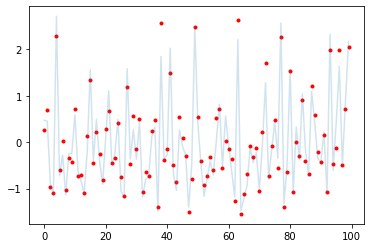

In [26]:
plt.scatter(np.arange(0, len(y_train[:100])),model.predict(X_test_red[:100]), marker='.', color='red')
plt.plot(np.arange(0, len(y_train[:100])), y_test[:100], alpha=0.2)

plt.show()


235/235 [==============================] - 1s 3ms/step


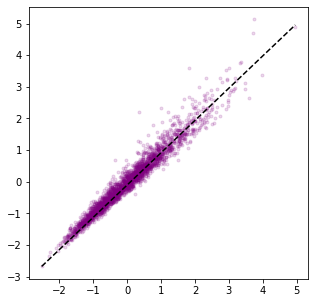

In [54]:
y_pred_test=model.predict(X_test_red)
y_pred_train=model.predict(X_train_red)

plt.figure(figsize=(5,5))

plt.scatter(y_pred_test,  y_test, marker='.', color='purple',alpha=0.15)
plt.plot([np.min(y_pred_test), np.max(y_pred_test)],[np.min(y_test), np.max(y_pred_test)], color='black', linestyle='--')
plt.show()

C:\Users\zways\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zways\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


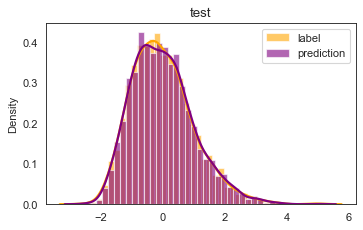

C:\Users\zways\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zways\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


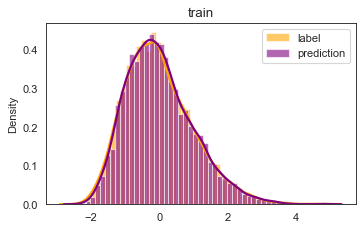

In [78]:
import seaborn as sns
sns.set_style("white")


# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(5,3), dpi= 80)
sns.distplot(pd.DataFrame(y_test), color="orange", label="label", **kwargs)
sns.distplot(pd.DataFrame(y_pred_test), color="purple", label="prediction", **kwargs)
plt.legend()
plt.title("test")
plt.show()
plt.figure(figsize=(5,3), dpi= 80)

sns.distplot(pd.DataFrame(y_train), color="orange", label="label", **kwargs)
sns.distplot(pd.DataFrame(y_pred_train), color="purple", label="prediction", **kwargs)
plt.title("train")

plt.legend()

plt.show()




In [28]:
from ase.io import read
xyz_filename="new_positions_sparse.xyz"
frames = read(xyz_filename, ':')
n_frames = len(frames)

# species and PBC
global_species = []
for frame in frames:
    global_species.extend(frame.get_atomic_numbers())
    frame.set_pbc(True)
global_species_unique = np.unique(global_species)
#print("loaded xyz file: {fn}, with {n_frames} frames and elements: {ele}".format(fn=xyz_filename, n_frames=n_frames, ele=global_species_unique))

In [49]:
global_species

[8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 1,
 1,


In [124]:
global_species_unique

array([1, 8])

In [201]:
a=np.array([[1,2,3,4],
          [2,5,6,7]])
res=np.zeros((2,2))

res[0,0]=np.sqrt(np.array([1,2,3,4])@np.array([1,2,3,4]).T *np.array([1,2,3,4])@np.array([1,2,3,4]).T)
res[1,0]=np.sqrt(np.array([2,5,6,7])@np.array([2,5,6,7]).T *np.array([1,2,3,4])@np.array([1,2,3,4]).T)
res[0,1]=np.sqrt(np.array([1,2,3,4])@np.array([1,2,3,4]).T *np.array([2,5,6,7])@np.array([2,5,6,7]).T)
res[1,1]=np.sqrt(np.array([2,5,6,7])@np.array([2,5,6,7]).T *np.array([2,5,6,7])@np.array([2,5,6,7]).T)
# np.array([1,2,3,4])@np.array([1,2,3,4]).T /
# np.array([2,5,6,7])@np.array([1,2,3,4]).T /
# np.array([1,2,3,4])@np.array([2,5,6,7]).T /
# np.array([2,5,6,7])@np.array([2,5,6,7])./a /
        
print(a@a.T)
print(res)

[[ 30  58]
 [ 58 114]]
[[ 5.47722558  5.47722558]
 [10.67707825 10.67707825]]


In [ ]:
k(a,b)/(sqrt(k(a,a)*k(b,b)))

